## 1. Create the following dataset (1 point)

* One column per stock and concept: Open, High, Low, Close, Adj close per stock
* Date as index

Be ready for dealing with errors in the names and some missing values.

### 1.1. Importing the necessary libraries for the project

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 1.2. Data reading and cleaning
using the given data set I will save it in a pandas dataframe called stocks

In [58]:
stocks = pd.read_csv("stocks_unclean.csv")

I will now look at how the data looks like usign describe and head

In [59]:
stocks.describe()

,value
count,1.449600e+04
mean,5.746557e+06
std,2.630028e+07
min,-5.485649e-05
25%,1.296500e+02
50%,1.046645e+03
75%,3.138312e+03
max,4.265100e+08


In [60]:
stocks.head()

,date,variable,value
0,2020-01-28,adj_close_MSFT,1.623646e+02
1,2020-02-12,delta_price_GOOG,3.246008e-06
2,2020-07-14,high_AAPL,9.725500e+01
3,2021-10-22,volume_AMZN,3.139100e+06
4,2021-06-04,volume_MSFT,2.528110e+07


Now I will check the values under the "variable" column

In [61]:
stocks.value_counts("variable")

variable
volume_AMZN         520
adj_close_AMZN      520
low_MSFT            520
volume_MSFT         519
adj_close_GOOG      519
volume_GOOG         519
open_GOOG           519
low_AMZN            518
high_AMZN           518
open_AMZN           518
close_MSFT          518
low_GOOG            517
delta_price_GOOG    517
high_GOOG           517
delta_price_AAPL    517
open_AAPL           517
high_MSFT           517
close_AMZN          517
low_AAPL            517
adj_close_MSFT      517
delta_price_MSFT    517
close_GOOG          516
open_MSFT           516
adj_close_AAPL      513
close_AAPL          513
delta_price_AMZN    513
high_AAPL           510
volume_AAPL         508
delta_price_AMZ       9
high_APL              8
open_MST              6
close_GOG             6
close_APL             6
adj_close_APL         6
low_GOG               5
volume_APL            5
high_GOG              5
delta_price_MST       5
high_MST              5
adj_close_MST         5
close_AMZ             5
delta_p

I noticed that there are some variables that are misspelled so I will replace them with the correct string using a for loop

In [62]:
spelling_dict = {"APL":"AAPL", "MST":"MSFT", "GOG":"GOOG", "AMZ":"AMZN"}
price_type = ["open_", "close_", "high_", "low_", "adj_close_", "delta_price_", "volume_"]

for key, value in spelling_dict.items():
    for i in price_type:
        stocks["variable"].replace(f"{i}{key}",f"{i}{value}", inplace = True)

In [63]:
print(stocks.value_counts("variable"))

variable
high_GOOG           522
high_AMZN           522
volume_GOOG         522
volume_AMZN         522
open_MSFT           522
open_GOOG           522
open_AMZN           522
low_MSFT            522
low_GOOG            522
low_AMZN            522
high_MSFT           522
adj_close_AMZN      522
volume_MSFT         522
delta_price_MSFT    522
delta_price_GOOG    522
delta_price_AMZN    522
close_MSFT          522
close_GOOG          522
close_AMZN          522
adj_close_MSFT      522
adj_close_GOOG      522
low_AAPL            519
open_AAPL           519
close_AAPL          519
adj_close_AAPL      519
high_AAPL           518
delta_price_AAPL    518
volume_AAPL         513
dtype: int64


Now the variables column is spelled correctly! YAY. 


### 1.3. Changing date column to datetime format

In [64]:
stocks.dtypes

date         object
variable     object
value       float64
dtype: object

In [65]:
stocks['date']= pd.to_datetime(stocks['date'])

stocks.dtypes

date        datetime64[ns]
variable            object
value              float64
dtype: object

### 1.4. Creating a dataframe with variables as columns and date as index using a pivot table

In [66]:
stocks_new = pd.pivot_table(
    data=stocks, 
    values="value",
    index="date",
    columns="variable"
)

In [67]:
stocks_new.head()

variable,adj_close_AAPL,adj_close_AMZN,adj_close_GOOG,adj_close_MSFT,close_AAPL,close_AMZN,close_GOOG,close_MSFT,delta_price_AAPL,delta_price_AMZN,...,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,72.337990,1847.839966,1337.020020,154.749741,73.412498,1847.839966,1337.020020,157.699997,9.225681e-09,2.329929e-06,...,1329.084961,156.449997,72.482498,1842.0,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,73.988480,1898.010010,1367.369995,157.615112,75.087502,1898.010010,1367.369995,160.619995,7.584152e-09,5.711097e-06,...,1341.550049,158.330002,74.059998,1875.0,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,73.269157,1874.969971,1360.660034,155.652542,74.357498,1874.969971,1360.660034,158.619995,4.783923e-10,2.781312e-06,...,1345.543945,NaN,74.287498,1864.5,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,73.852989,1902.880005,1394.209961,156.054855,74.949997,1902.880005,1394.209961,159.029999,1.269136e-08,1.055690e-05,...,NaN,156.509995,73.447502,1860.0,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,73.505653,1906.859985,1393.339966,154.632004,74.597504,1906.859985,1393.339966,157.580002,-3.329556e-09,5.834471e-07,...,1390.380005,157.320007,74.959999,1904.5,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0


In [52]:
stocks_new.columns

Index(['close_AAPL', 'close_AMZN', 'close_GOOG', 'close_MSFT', 'high_AAPL',
       'high_AMZN', 'high_GOOG', 'high_MSFT', 'low_AAPL', 'low_AMZN',
       'low_GOOG', 'low_MSFT', 'open_AAPL', 'open_AMZN', 'open_GOOG',
       'open_MSFT', 'volume_AAPL', 'volume_AMZN', 'volume_GOOG',
       'volume_MSFT'],
      dtype='object', name='variable')

now that it's in a dataframe with the format I like I will remove the columns I do not need

In [12]:
stocks_new.drop(['adj_close_AAPL','adj_close_AMZN', 'adj_close_GOOG', 'adj_close_MSFT','delta_price_AAPL','delta_price_AMZN', 'delta_price_GOOG', 'delta_price_MSFT'], axis = 1, inplace = True)

stocks_new.head()

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.0,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.0,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.5,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.0,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.5,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0


### 1.5. Check and address the missing values

Using isna I will check for null values

In [13]:
stocks_new.isna().sum()

variable
close_AAPL      7
close_AMZN      4
close_GOOG      7
close_MSFT      2
high_AAPL       8
high_AMZN       6
high_GOOG       2
high_MSFT       2
low_AAPL        8
low_AMZN        4
low_GOOG        2
low_MSFT        3
open_AAPL       8
open_AMZN       3
open_GOOG       2
open_MSFT       4
volume_AAPL    13
volume_AMZN     2
volume_GOOG     7
volume_MSFT     6
dtype: int64

to address the null values I will use linear interpolation which uses adjacent values to estimate the missing value

In [14]:
stocks_clean = stocks_new.interpolate(method = 'linear', list_direction = 'forward')

In [15]:
stocks_clean.head()

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.0,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.0,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,157.419998,74.287498,1864.5,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,1367.961975,156.509995,73.447502,1860.0,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.5,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0


In [16]:
stocks_clean.isna().sum()

variable
close_AAPL     0
close_AMZN     0
close_GOOG     0
close_MSFT     0
high_AAPL      0
high_AMZN      0
high_GOOG      0
high_MSFT      0
low_AAPL       0
low_AMZN       0
low_GOOG       0
low_MSFT       0
open_AAPL      0
open_AMZN      0
open_GOOG      0
open_MSFT      0
volume_AAPL    0
volume_AMZN    0
volume_GOOG    0
volume_MSFT    0
dtype: int64

now that the data is ready we can move on to the next part!!

## 2. Visualize the data (1.5 point)

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points)
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 point)

### 2.1. Creating a 2x2 grid of plots for Open and Close price per Stock

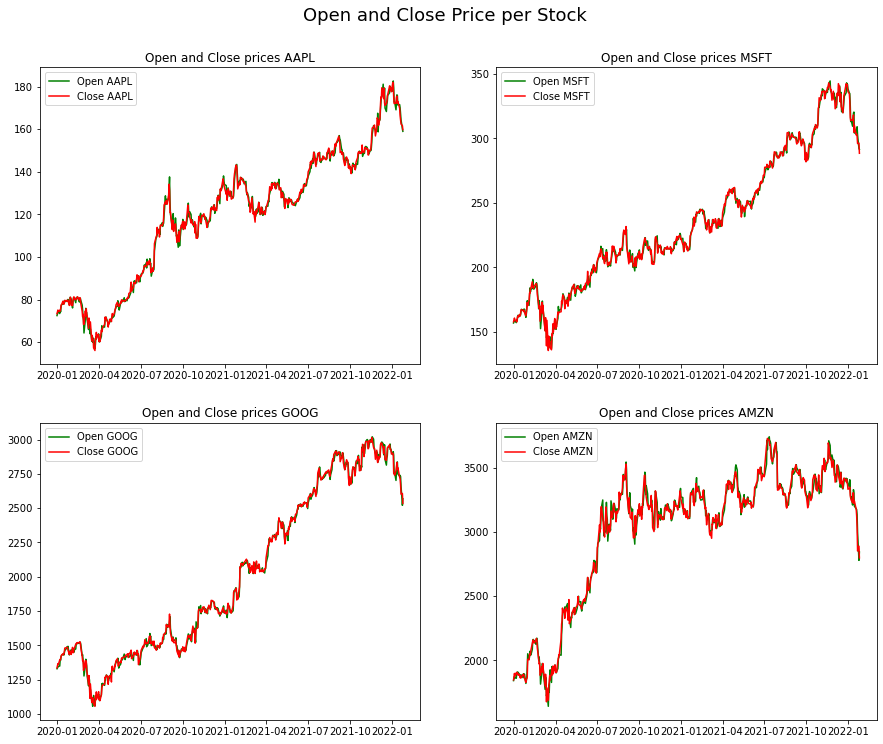

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Open and Close Price per Stock", fontsize=18, y=0.95)

tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

# loop through tickers and axes
for ticker, axs in zip(tickers, axs.ravel()):
    axs.plot(stocks_clean.index, stocks_clean[f"open_{ticker}"], label = f"Open {ticker}", c = "green")
    axs.plot(stocks_clean.index, stocks_clean[f"close_{ticker}"], label = f"Close {ticker}", c = "red")
    axs.set_title(f"Open and Close prices {ticker}")
    axs.legend(fontsize = 10)

### 2.2. Creating a weekly average open and close price per stock

First, I am creating separate series for the weekly average calculation for each stock

In [76]:
weekly_average_close_AAPL = stocks_clean.loc[:,"close_AAPL"].resample("W").mean()
weekly_average_close_MSFT = stocks_clean.loc[:,"close_MSFT"].resample("W").mean()
weekly_average_close_AMZN = stocks_clean.loc[:,"close_AMZN"].resample("W").mean()
weekly_average_close_GOOG = stocks_clean.loc[:,"close_GOOG"].resample("W").mean()

weekly_average_open_AAPL = stocks_clean.loc[:,"open_AAPL"].resample("W").mean()
weekly_average_open_MSFT = stocks_clean.loc[:,"open_MSFT"].resample("W").mean()
weekly_average_open_AMZN = stocks_clean.loc[:,"open_AMZN"].resample("W").mean()
weekly_average_open_GOOG = stocks_clean.loc[:,"open_GOOG"].resample("W").mean()

(0.0, 4000.0)

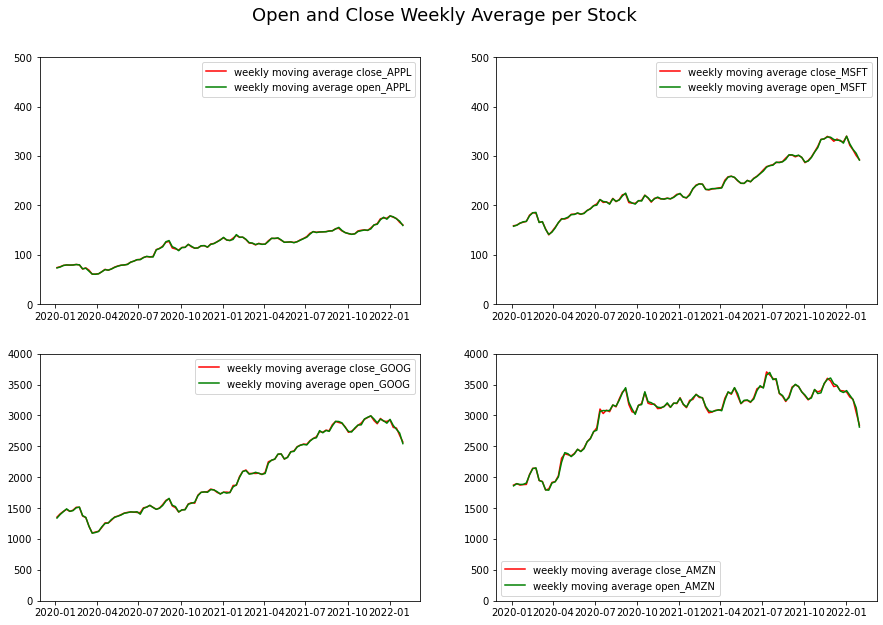

In [77]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Open and Close Weekly Average per Stock", fontsize=18, y=0.95)

ax[0][0].plot(weekly_average_close_AAPL.index, weekly_average_close_AAPL, label="weekly moving average close_APPL", c = "red")
ax[0][0].plot(weekly_average_open_AAPL.index, weekly_average_open_AAPL, label="weekly moving average open_APPL", c = "green")
ax[0][0].legend(fontsize=10)
ax[0][0].set_ylim(0,500)

ax[0][1].plot(weekly_average_close_MSFT.index, weekly_average_close_MSFT, label="weekly moving average close_MSFT", c = "red")
ax[0][1].plot(weekly_average_open_MSFT.index, weekly_average_open_MSFT, label="weekly moving average open_MSFT", c = "green")
ax[0][1].legend(fontsize=10)
ax[0][1].set_ylim(0,500)

ax[1][0].plot(weekly_average_close_GOOG.index, weekly_average_close_GOOG, label="weekly moving average close_GOOG", c = "red")
ax[1][0].plot(weekly_average_open_GOOG.index, weekly_average_open_GOOG, label="weekly moving average open_GOOG", c = "green")
ax[1][0].legend(fontsize=10)
ax[1][0].set_ylim(0,4000)

ax[1][1].plot(weekly_average_close_AMZN.index, weekly_average_close_AMZN, label="weekly moving average close_AMZN", c = "red")
ax[1][1].plot(weekly_average_open_AMZN.index, weekly_average_open_AMZN, label="weekly moving average open_AMZN", c = "green")
ax[1][1].legend(fontsize=10)
ax[1][1].set_ylim(0,4000)


### 2.3. Creating other visualizations

creating a new column that calculates the volatility (high price - low price) of each stock 

In [20]:
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

for ticker in tickers:
    stocks_clean[f"volatility_{ticker}"] = stocks_clean[f"high_{ticker}"] - stocks_clean[f"low_{ticker}"]

creating another dataframe containing the volatility 

In [21]:
volatility = stocks_clean.filter(regex='volatility')

In [22]:
volatility.head()

variable,volatility_AAPL,volatility_MSFT,volatility_GOOG,volatility_AMZN
date,,,,
2019-12-31,1.040001,1.320007,8.915039,21.030029
2020-01-02,1.352501,2.399994,26.589966,33.859985
2020-01-03,1.019997,2.529999,26.956055,21.699951
2020-01-06,1.802498,2.590012,28.538025,43.689941
2020-01-07,0.854996,2.349991,12.609985,21.849976


In [23]:
volatility.reset_index(inplace=True)

volatility.head()

variable,date,volatility_AAPL,volatility_MSFT,volatility_GOOG,volatility_AMZN
0,2019-12-31,1.040001,1.320007,8.915039,21.030029
1,2020-01-02,1.352501,2.399994,26.589966,33.859985
2,2020-01-03,1.019997,2.529999,26.956055,21.699951
3,2020-01-06,1.802498,2.590012,28.538025,43.689941
4,2020-01-07,0.854996,2.349991,12.609985,21.849976


In [24]:
volatility["date"] = pd.to_datetime(volatility["date"])

volatility["year"] = volatility["date"].dt.year
volatility["month"] = volatility["date"].dt.month

<ipython-input-24-9d02fb3963a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volatility["date"] = pd.to_datetime(volatility["date"])
<ipython-input-24-9d02fb3963a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volatility["year"] = volatility["date"].dt.year
<ipython-input-24-9d02fb3963a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [25]:
volatility_APPL_pivot = pd.pivot_table(
    data=volatility, 
    values="volatility_AAPL",
    index="year",
    columns="month",
    aggfunc = "mean")

volatility_MSFT_pivot = pd.pivot_table(
    data=volatility, 
    values="volatility_MSFT",
    index="year",
    columns="month",
    aggfunc = "mean")

volatility_GOOG_pivot = pd.pivot_table(
    data=volatility, 
    values="volatility_GOOG",
    index="year",
    columns="month",
    aggfunc = "mean")

volatility_AMZN_pivot = pd.pivot_table(
    data=volatility, 
    values="volatility_AMZN",
    index="year",
    columns="month",
    aggfunc = "mean")

#### Heatmaps for volatility per year and month for each stock

These plots show which months were the most volatile for each stock

<AxesSubplot:xlabel='month', ylabel='year'>

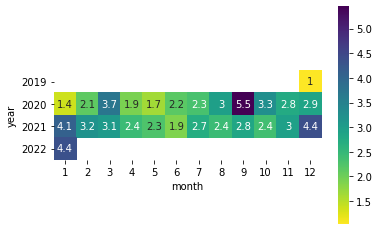

In [26]:
sns.heatmap(volatility_APPL_pivot, cmap='viridis_r', square = True, annot = True)

<AxesSubplot:xlabel='month', ylabel='year'>

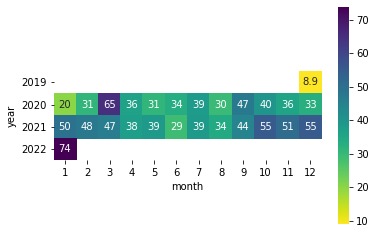

In [27]:
sns.heatmap(volatility_GOOG_pivot, cmap='viridis_r', square = True, annot = True)

<AxesSubplot:xlabel='month', ylabel='year'>

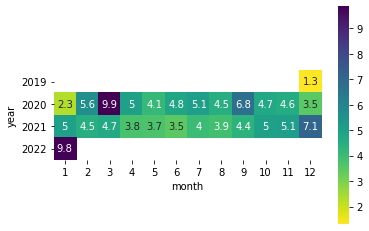

In [28]:
sns.heatmap(volatility_MSFT_pivot, cmap='viridis_r', square = True, annot = True)

<AxesSubplot:xlabel='month', ylabel='year'>

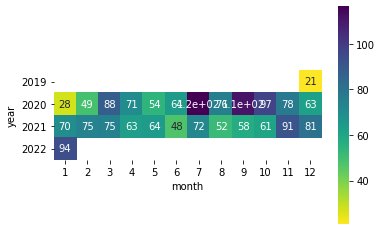

In [29]:
sns.heatmap(volatility_AMZN_pivot, cmap='viridis_r', square = True, annot = True)

#### Scatter plot for prices

I wanted to see if there were any correlation in the close price increase of each stock

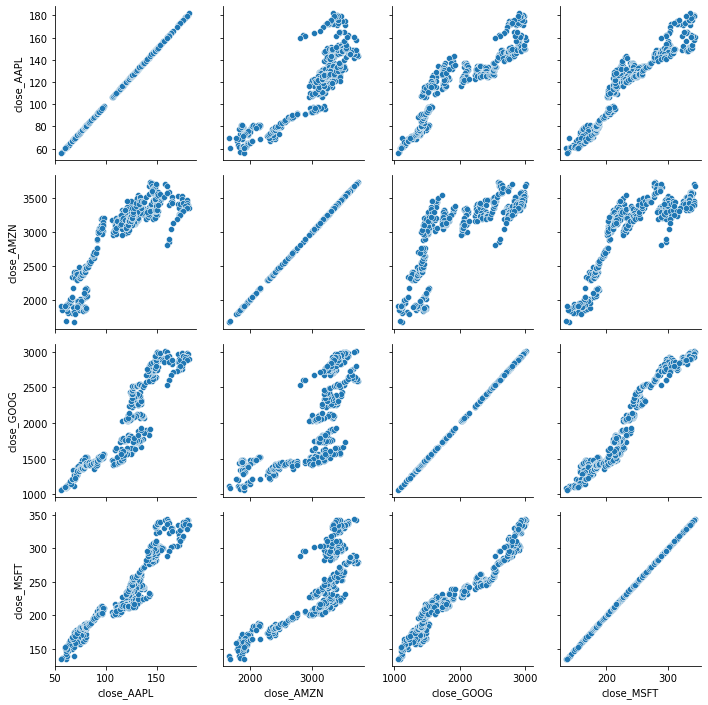

In [30]:
g = sns.PairGrid(stocks_clean.filter(regex='close'))
g.map(sns.scatterplot)

## 3. Create a function that calculates the Return of Investment (ROI) (1 point)

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it.

$$ ROI = \frac{FVI - IVI}{IVI} * 100$$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data

In [31]:
def ROI(data, lookback, name):
    IVI = data[f"close_{name}"].shift(lookback)
    FVI = data[f"close_{name}"]
    data[f"ROI_{lookback}_{name}"] = ((FVI-IVI)/IVI)*100
    return

## 4. Apply the roi function to the portfolio (1.5 point)

Create as many ROI columns as different stocks you have in the portfolio and plot them in a 2x2 grid, representing for each stock:
* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

### 4.1. Using the ROI function for all periods and stocks

In [32]:
ROI(stocks_clean, 365, "AAPL")
ROI(stocks_clean, 180, "AAPL")
ROI(stocks_clean, 90, "AAPL")

ROI(stocks_clean, 365, "MSFT")
ROI(stocks_clean, 180, "MSFT")
ROI(stocks_clean, 90, "MSFT")

ROI(stocks_clean, 365, "GOOG")
ROI(stocks_clean, 180, "GOOG")
ROI(stocks_clean, 90, "GOOG")

ROI(stocks_clean, 365, "AMZN")
ROI(stocks_clean, 180, "AMZN")
ROI(stocks_clean, 90, "AMZN")

In [33]:
stocks_clean.tail()

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,...,ROI_90_AAPL,ROI_365_MSFT,ROI_180_MSFT,ROI_90_MSFT,ROI_365_GOOG,ROI_180_GOOG,ROI_90_GOOG,ROI_365_AMZN,ROI_180_AMZN,ROI_90_AMZN
date,,,,,,,,,,,,,,,,,,,,,
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,...,11.586222,42.756962,22.414139,2.576847,81.536180,15.240099,-4.417242,-1.309566,-5.612845,-9.892047
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,...,10.003337,44.825933,22.367836,1.552246,78.472691,13.297602,-6.941420,-3.646886,-7.252317,-12.259155
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,...,9.647589,45.555114,18.540025,-1.254215,75.762010,9.259033,-9.284131,-7.394814,-13.716251,-17.308403
2022-01-24,161.619995,2890.879883,2607.439941,296.369995,162.300003,2898.899902,2615.570068,297.109985,154.699997,2707.040039,...,8.447961,41.675028,17.392849,-2.772132,73.065534,8.702667,-10.215837,-8.581262,-12.174292,-16.828121
2022-01-25,159.779999,2799.719971,2534.709961,288.489990,162.759995,2872.000000,2586.770020,294.989990,157.020004,2762.899902,...,7.386253,38.231909,16.712517,-5.481296,66.927462,8.244154,-12.216924,-11.429856,-12.247963,-19.738321


### 4.2. Plotting ROI per stock

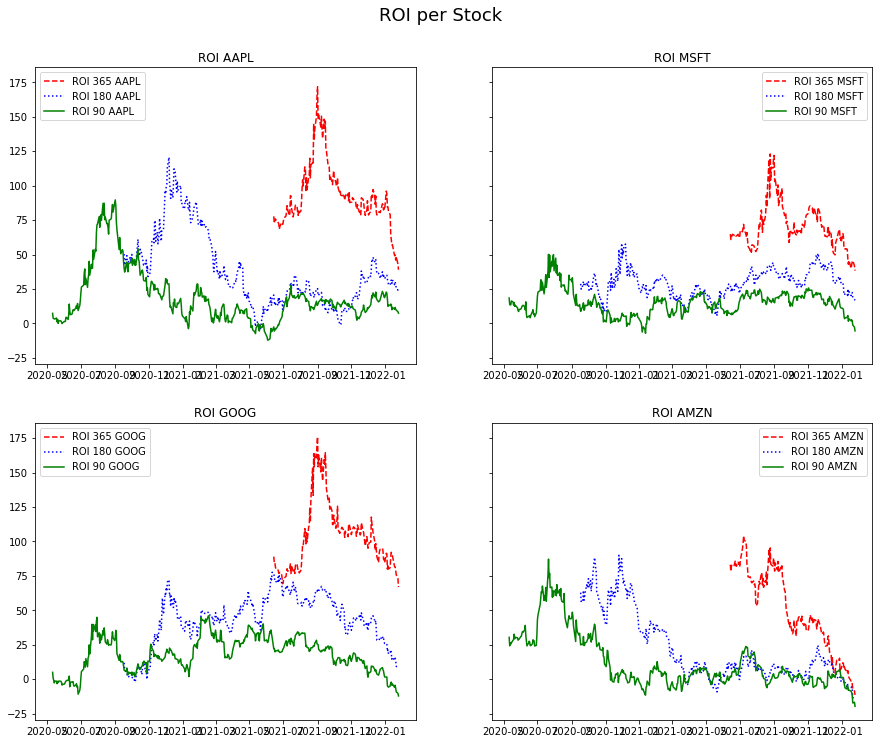

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), sharey = True)
plt.subplots_adjust(hspace=0.2)
fig.suptitle("ROI per Stock", fontsize=18, y=0.95)

tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

# loop through tickers and axes
for ticker, axs in zip(tickers, axs.ravel()):
    axs.plot(stocks_clean.index, stocks_clean[f"ROI_365_{ticker}"], label = f"ROI 365 {ticker}", c = "red", linestyle = "dashed")
    axs.plot(stocks_clean.index, stocks_clean[f"ROI_180_{ticker}"], label = f"ROI 180 {ticker}", c = "blue", linestyle = "dotted")
    axs.plot(stocks_clean.index, stocks_clean[f"ROI_90_{ticker}"], label = f"ROI 90 {ticker}", c = "green")
    axs.set_title(f"ROI {ticker}")
    axs.legend(fontsize = 10)

## 5. Optimizing portfolio (1 point)

Given these two portfolios, which one has the best ROI? Keep in mind that ROI is a percentage and you can't average it directly -- you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period.

* Portfolio 1:
    * AAPL 40%
    * GOOG 30%
    * MSFT 20%
    * AMZN 10%


* Portfolio 2:
    * AAPL 30%
    * GOOG 20%
    * MSFT 10%
    * AMZN 40%

### 5.1. Creating a function for USD Returns and using it for each stock and lookback period

In [96]:
def USD_return(data, lookback, name):
    data[f"USD_Return_{lookback}_{name}"] = ((data[f"ROI_{lookback}_{name}"]*data[f"close_{name}"].shift(lookback)))/100
    return data[f"USD_Return_{lookback}_{name}"].sum()

In [97]:
USD_return(stocks_clean,90, "AAPL")
USD_return(stocks_clean,90, "MSFT")
USD_return(stocks_clean,90, "GOOG")
USD_return(stocks_clean,90, "AMZN")

USD_return(stocks_clean,180, "AAPL")
USD_return(stocks_clean,180, "MSFT")
USD_return(stocks_clean,180, "GOOG")
USD_return(stocks_clean,180, "AMZN")

USD_return(stocks_clean,365, "AAPL")
USD_return(stocks_clean,365, "MSFT")
USD_return(stocks_clean,365, "GOOG")
USD_return(stocks_clean,365, "AMZN")

165714.9658203125

### 5.2. Calculating the average return per stock and lookback

In [98]:
average_return_AAPL_90 = stocks_clean["USD_Return_90_AAPL"].mean()
average_return_AAPL_180 = stocks_clean["USD_Return_180_AAPL"].mean()
average_return_AAPL_365 = stocks_clean["USD_Return_365_AAPL"].mean()

average_return_MSFT_90 = stocks_clean["USD_Return_90_MSFT"].mean()
average_return_MSFT_180 = stocks_clean["USD_Return_180_MSFT"].mean()
average_return_MSFT_365 = stocks_clean["USD_Return_365_MSFT"].mean()

average_return_GOOG_90 = stocks_clean["USD_Return_90_GOOG"].mean()
average_return_GOOG_180 = stocks_clean["USD_Return_180_GOOG"].mean()
average_return_GOOG_365 = stocks_clean["USD_Return_365_GOOG"].mean()

average_return_AMZN_90 = stocks_clean["USD_Return_90_AMZN"].mean()
average_return_AMZN_180 = stocks_clean["USD_Return_180_AMZN"].mean()
average_return_AMZN_365 = stocks_clean["USD_Return_365_AMZN"].mean()

print(average_return_AAPL_365)
print(average_return_MSFT_365)
print(average_return_GOOG_365)
print(average_return_AMZN_365)

72.43853533799481
124.30850316916302
1407.9857096094995
1055.5093364351114


### 5.3. Calculating the returns per portfolio

**answer: portfolio 2 had a higher return than portfolio 1**

In [99]:
portfolio_1 = (average_return_AAPL_90*.4)+(average_return_MSFT_90*.2)+(average_return_GOOG_90*.3)+(average_return_AMZN_90*.1)

portfolio_2 = (average_return_AAPL_90*.3)+(average_return_MSFT_90*.1)+(average_return_GOOG_90*.2)+(average_return_AMZN_90*.4)


print(portfolio_1)
print(portfolio_2)

136.795755704244
183.93562053044639


In [100]:
portfolio_1 = (average_return_AAPL_180*.4)+(average_return_MSFT_180*.2)+(average_return_GOOG_180*.3)+(average_return_AMZN_180*.1)

portfolio_2 = (average_return_AAPL_180*.3)+(average_return_MSFT_180*.1)+(average_return_GOOG_180*.2)+(average_return_AMZN_180*.4)


print(portfolio_1)
print(portfolio_2)

283.67882039923416
348.68478994202195


In [101]:
portfolio_1 = (average_return_AAPL_365*.4)+(average_return_MSFT_365*.2)+(average_return_GOOG_365*.3)+(average_return_AMZN_365*.1)

portfolio_2 = (average_return_AAPL_365*.3)+(average_return_MSFT_365*.1)+(average_return_GOOG_365*.2)+(average_return_AMZN_365*.4)


print(portfolio_1)
print(portfolio_2)

581.7837612953915
737.9632874142592


## 6. Find a better combination in your portfolio (1 point)

The new combination should beat the best portfolio that you found in the previous exercise.

### 6.1. I found two portfolios that have higher returns than portfolio 2

I wanted to still diversify my portfolio and keep stock ratio above 10%

In [102]:
portfolio_3 = (stocks_clean["USD_Return_90_AAPL"].mean()*.1)+(stocks_clean["USD_Return_90_MSFT"].mean()*.2)+(stocks_clean["USD_Return_90_GOOG"].mean()*.4)+(stocks_clean["USD_Return_90_AMZN"].mean()*.3)

print(portfolio_3)


219.08356852354825


* **Portfolio 4:**
    * AAPL - 10%
    * MSFT - 10%
    * GOOG - 50%
    * AMZN - 30%

In [86]:
portfolio_4 = (stocks_clean["USD_Return_90_AAPL"].mean()*.1)+(stocks_clean["USD_Return_90_MSFT"].mean()*.1)+(stocks_clean["USD_Return_90_GOOG"].mean()*.5)+(stocks_clean["USD_Return_90_AMZN"].mean()*.3)

print(portfolio_4)


247.69666595812197
